In [1]:
import copy as cp
import glob

import corner
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib import colors
from scipy.stats import binned_statistic
from scipy.ndimage import uniform_filter1d
from petitRADTRANS import nat_cst as nc
from petitRADTRANS.retrieval.plotting import contour_corner
from species.util.read_util import get_mass
import scicomap as sc
import holoviews as hv


species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03


In [2]:
#def contour_corner(sampledict,
#                   parameter_names,
#                   output_file=None,
#                   parameter_ranges=None,
#                   parameter_plot_indices=None,
#                   true_values=None,
#                   short_name=None,
#                   legend=False,
#                   prt_plot_style=True,
#                   plot_best_fit = False,
#                   colors = None,
#                   quintiles = [0.16, 0.5, 0.84],
#                   **kwargs)

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data_dir = "multinest/"
retrievals = ["HR 8799 b_exo-rem_fitcorr","HR 8799 b_diamondback_fitcorr","HR 8799 b_petrus2023_fitcorr"]
sample_dict = {}
parameters = {}
for ret in retrievals:
    sample_dict[ret] =  cp.copy(np.genfromtxt(data_dir + ret + "post_equal_weights.dat")[:,:-1])
    print(sample_dict[ret].shape)

(2766, 9)
(2911, 9)
(3189, 10)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
parameters[retrievals[0]] = ["teff", "logg", "Fe/H", "C/O", "radius", "parallax", "log_l_osiris", "f_osiris", "a_osiris", "log_L_bol", "M"]
parameters[retrievals[1]] = ["teff", "logg", "Fe/H", "fsed", "radius", "parallax", "log_l_osiris", "f_osiris", "a_osiris", "log_L_bol", "M"]
parameters[retrievals[2]] = ["teff", "logg", "Fe/H", "C/O", "ad_index", "radius", "parallax", "log_l_osiris", "f_osiris", "a_osiris", "log_L_bol", "M"]

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
out_of_bounds = {}
for ret in retrievals:
        out_of_bounds[ret] = np.random.uniform(low = -2, high = -1, size = sample_dict[ret].shape[0])
        print(out_of_bounds[ret].shape)

sample_dict[retrievals[0]] = np.insert(sample_dict[retrievals[0]], 3, -1, axis = 1) #fsed
sample_dict[retrievals[0]] = np.insert(sample_dict[retrievals[0]], 5, -1, axis = 1)#ad_index
sample_dict[retrievals[1]] = np.insert(sample_dict[retrievals[1]], 4, -1, axis = 1) #C/O
sample_dict[retrievals[1]] = np.insert(sample_dict[retrievals[1]], 5, -1, axis = 1) #ad_index
sample_dict[retrievals[2]] = np.insert(sample_dict[retrievals[2]], 3, -1, axis = 1) #ad_index

params_use = {}
all_params = ["teff", "logg", "Fe/H", "fsed", "C/O", "ad_index", "radius", "parallax", "log_l_osiris", "f_osiris", "a_osiris", "log_L_bol", "M"]

params_use[retrievals[0]] = all_params
params_use[retrievals[1]] = all_params
params_use[retrievals[2]] = all_params




(2766,)
(2911,)
(3189,)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
teff_index = np.argwhere(np.array(all_params) == "teff")[0]
radius_index = np.argwhere(np.array(all_params) == "radius")[0]
for key,samples in sample_dict.items():
    lum_planet = (
        4.0
        * np.pi
        * (samples[..., radius_index] * nc.r_jup_mean) ** 2
        * nc.sigma
        * samples[..., teff_index] ** 4.0
        / nc.l_sun
    )
    sample_dict[key] = np.append(samples, np.log10(lum_planet), axis = 1)


logg_index = np.argwhere(np.array(all_params) == "logg")[0]
radius_index = np.argwhere(np.array(all_params) == "radius")[0]

for key,samples in sample_dict.items():
    mass_samples = get_mass(samples[..., logg_index], samples[..., radius_index])
    sample_dict[key] = np.append(samples, mass_samples, axis = 1)


    

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2766, 13)
(2911, 13)
(3189, 13)
13


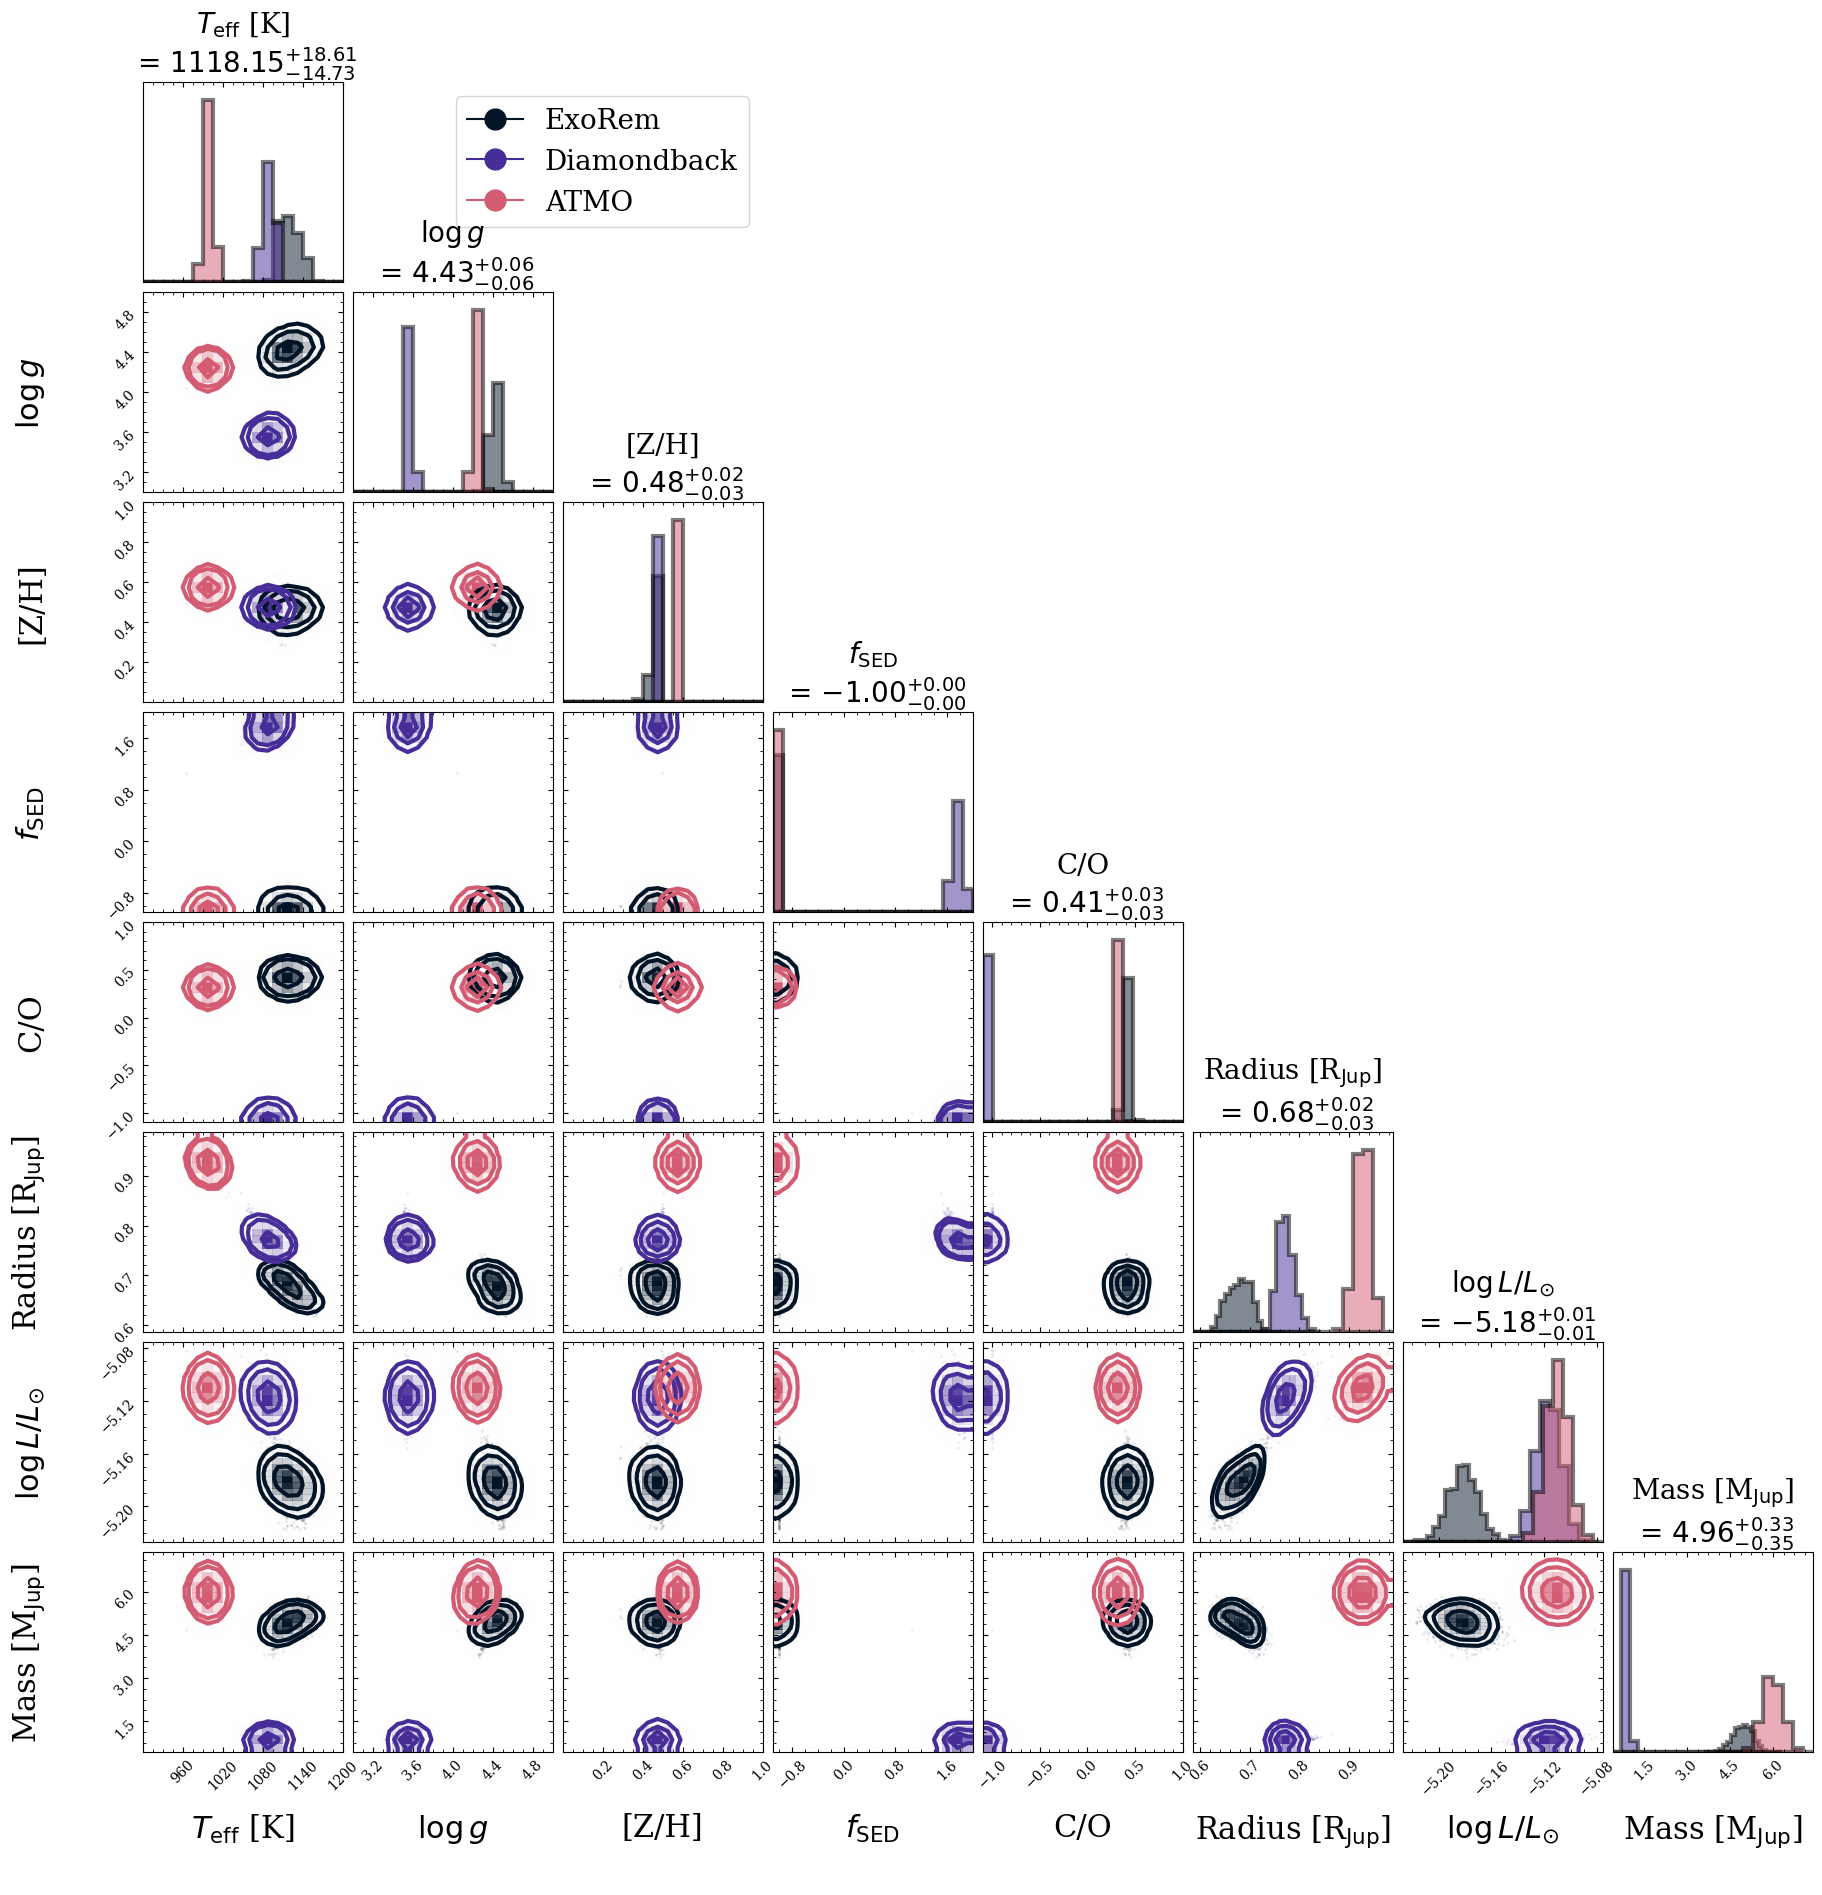

In [11]:

indices = [0,1,2,3,4,6,11,12]
parameter_plot_indices = {}
parameter_plot_indices[retrievals[0]] = indices

parameter_plot_indices[retrievals[1]] = indices
parameter_plot_indices[retrievals[2]] = indices

qual_map = sc.ScicoSequential(cmap='heat')
fixed_cmap = qual_map.get_mpl_color_map()

short_names = ["ExoRem", "Diamondback", "ATMO"]
snames = {}

for i,name in enumerate(retrievals):
    snames[name] = short_names[i]
    print(sample_dict[name].shape)

ranges = [(900.,1200.), 
                (3.,5.), 
                (0.,1.), 
                (-1.1,2.), 
                (-1.1,1.),
                None,
                None,
                None,
                None,
                None,
                None,
                None,
                None]
ranges_tight = [(900.,1200.), 
                (3.,5.), 
                (0.,1.), 
                (0,2.), 
                (0,1.),
                None,
                None,
                None,
                None,
                None,
                None,
                None,
                None]     
print(len(ranges))
parameter_ranges = {}
parameter_ranges[retrievals[0]] = ranges
parameter_ranges[retrievals[1]] = ranges
parameter_ranges[retrievals[2]] = ranges

labels =  [r"$T_{\rm eff}$ [K]", 
           r"$\log g$", 
           "[Z/H]", 
           r"$f_{\rm SED}$", 
           "C/O", 
           "ad_index", 
           r"Radius [R$_{\rm Jup}$]", 
           "parallax", 
           "log_l_osiris", 
           "f_osiris", 
           "a_osiris", 
           r"$\log L/L_{\odot}$", 
           r"Mass [M$_{\rm Jup}$]"]
luse = {}
for ret in retrievals:
    luse[ret] = labels
fig = contour_corner(sample_dict,
                     luse, 
                     output_file="plots/HR8799b_Grid_contour.pdf",
                     parameter_ranges=parameter_ranges,
                     parameter_plot_indices=parameter_plot_indices,
                     colors = [fixed_cmap(1/10),fixed_cmap(3/10),fixed_cmap(6/10)],
                     quintiles = [],
                     short_name=snames,
                     legend = True,
                     prt_plot_style = True,
                     label_kwargs={"fontsize":22},
                     title_kwargs={"fontsize":20},
                     contour_kwargs={"linewidths":3, "alpha" : 1.0},
                     hist_kwargs = {"linewidth":3,"histtype":"stepfilled", "ec":'k',"alpha":0.5},
                    )

In [27]:
myFile = "HR8799b_GridFits_Stats.txt"
with open(myFile,"w") as f:
    for key,samples in sample_dict.items():
        f.write(f" & {snames[key]} & ")
        for ind in parameter_plot_indices[key]:
            f.write(f"{labels[ind]} & ")
        f.write("\n &          & ")
        for ind in parameter_plot_indices[key]:
            low = np.quantile(samples[:,ind], q = 0.159)
            med = np.quantile(samples[:,ind], q = 0.50)
            high = np.quantile(samples[:,ind], q = 0.841)

            f.write(f"${med:.2f}\pm_{low:.2f}^{high:.2f} & ")
        f.write("\\\\\n")


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:13: DeprecationWarning: invalid escape sequence \p
<>:13: DeprecationWarning: invalid escape sequence \p
<>:13: DeprecationWarning: invalid escape sequence \p
<ipython-input-27-b0acf23395fd>:13: DeprecationWarning: invalid escape sequence \p
  f.write(f"${med:.2f}\pm_{low:.2f}^{high:.2f} & ")
